In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = load_boston() 
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
bos['MEDV'] = boston.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


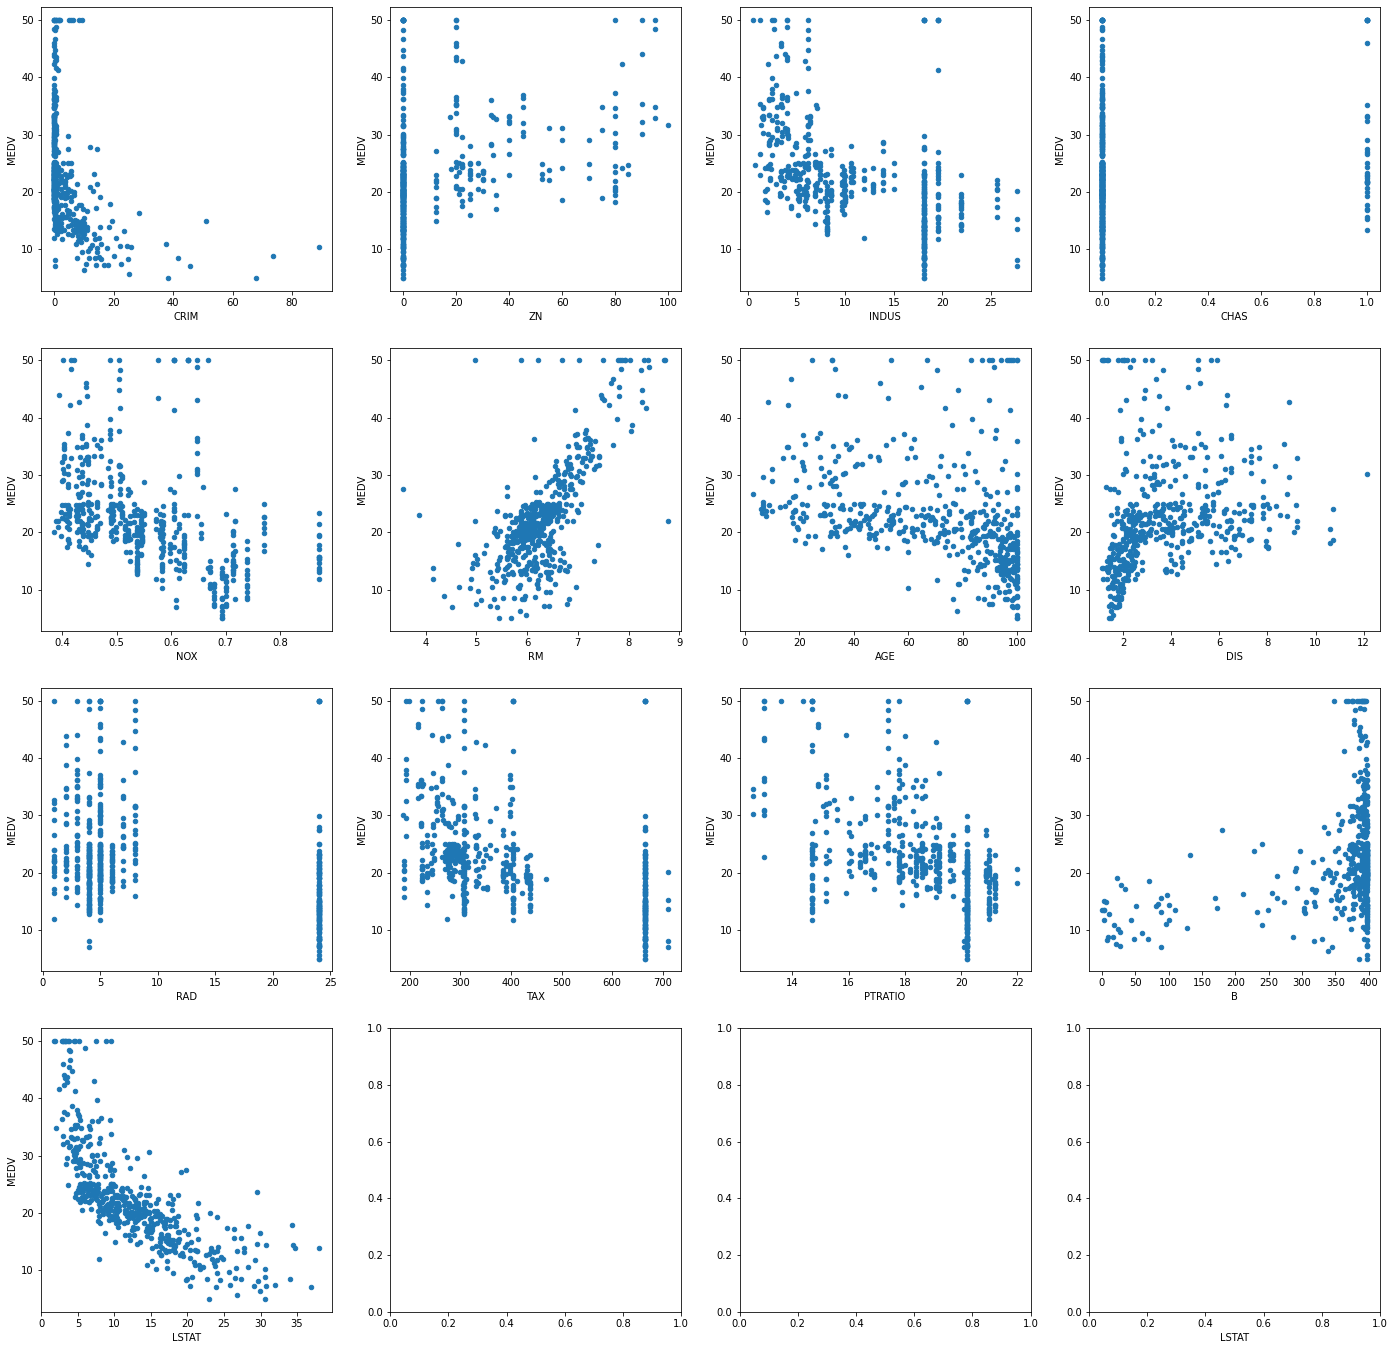

In [11]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(4, 4, figsize=(24, 24))
# unpack all the axes subplots
axe = axs.ravel()
for i in range(len(bos.drop(columns='MEDV').columns)):
    bos.plot(kind='scatter', x=bos.columns[i], y='MEDV', ax=axe[i])
    plt.xlabel(bos.columns[i])

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


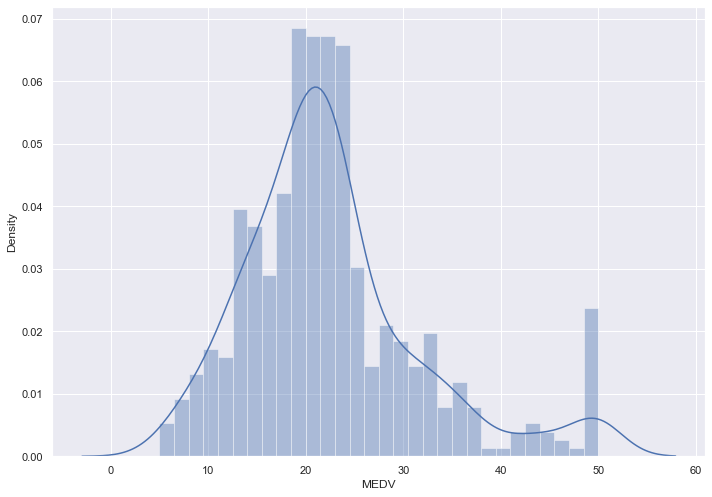

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

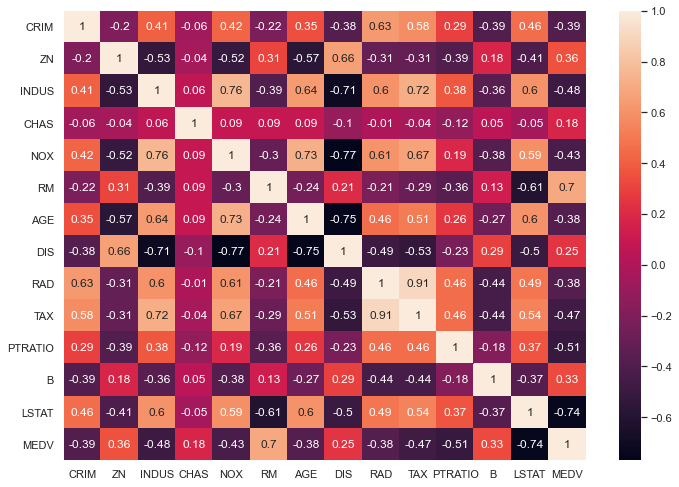

In [13]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

As seen in correlation matrix:
- LSTAT, PTRATIO, RM are highly correlated with MEDV
- TAX and RAD are highly correlated
- INDUS, NOX and AGE are high correlated with DIS
- INDUS is highly correlated with ZN, TAX, NOX

In [14]:
X = bos.drop(columns='MEDV')
y = bos.MEDV

In [15]:
X.shape[1]

13

In [16]:
## Checking vif
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns

In [17]:
vif

,VIF,Features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


Observations in VIF:
- INDUS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT have vif > 10

In [18]:
## Dropping TAX, as tax and rad had high correlation
X = bos.drop(columns=['MEDV', 'TAX'])
y = bos.MEDV
## Checking vif
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,2.100323,CRIM
1,2.697230,ZN
2,11.743319,INDUS
3,1.136630,CHAS
4,71.972959,NOX
5,77.946536,RM
6,21.377489,AGE
7,14.641579,DIS
8,5.599479,RAD
9,82.355181,PTRATIO


In [19]:
## Dropping NOX, as Nox and Dis, indus had high correlation
X = bos.drop(columns=['MEDV', 'TAX', 'NOX'])
y = bos.MEDV
## Checking vif
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,2.098376,CRIM
1,2.696984,ZN
2,9.930116,INDUS
3,1.134868,CHAS
4,58.059674,RM
5,19.826168,AGE
6,14.485117,DIS
7,5.405429,RAD
8,82.299026,PTRATIO
9,19.872129,B


In [20]:
## Dropping other columns with high correlation as well
X = bos.drop(columns=['MEDV', 'TAX', 'NOX', 'B', 'AGE', 'DIS'])
y = bos.MEDV
## Checking vif
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,2.048566,CRIM
1,1.801368,ZN
2,8.164547,INDUS
3,1.123261,CHAS
4,43.767132,RM
5,4.867376,RAD
6,57.716508,PTRATIO
7,8.061584,LSTAT


In [21]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state=355)

In [22]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
regression.score(x_train, y_train)

0.6852743389124581

In [24]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [25]:
adj_r2(x_train,y_train)

0.6784694597538086

In [26]:
lm = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + RM + RAD + PTRATIO + LSTAT', data=bos).fit()
lm.conf_int()

,0,1
Intercept,10.619480,27.102404
CRIM,-0.157797,-0.019711
ZN,-0.029286,0.018326
INDUS,-0.137108,0.061141
CHAS,1.523579,5.150357
RM,3.549548,5.242013
RAD,-0.012834,0.147742
PTRATIO,-1.179944,-0.668984
LSTAT,-0.647857,-0.452509


In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     139.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          7.94e-122
Time:                        10:19:31   Log-Likelihood:                -1542.4
No. Observations:                 506   AIC:                             3103.
Df Residuals:                     497   BIC:                             3141.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8609      4.195      4.496      0.000      10.619      27.102
CRIM          -0.0888      0.035     -2.526      0.012      -0.158      -0.020
ZN            -0.0055      0.012     -0.452      0.651      -0.029       0.018
INDUS         -0.0380      0.050     -0.753      0.452      -0.137       0.061
CHAS           3.3370      0.923      3.615      0.000       1.524       5.150
RM             4.3958      0.431     10.206      0.000       3.550       5.242
RAD            0.0675      0.041      1.651      0.099      -0.013       0.148
PTRATIO       -0.9245      0.130     -7.110      0.000      -1.180      -0.669
LSTAT         -0.5502      0.050    -11.067      0.000      -0.648      -0.453
==============================================================================
Omnibus:                      184.679   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.037
Skew:                           1.567   Prob(JB):                    1.58e-185
Kurtosis:                       8.527   Cond. No.                         579.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As p values for ZN and INDUS > 0.05, we fail to reject null hypothesis. Hence, there is no correlation between MEDV and ZN, INDUS. So, we drop them

In [28]:
lm = smf.ols(formula='MEDV ~ CRIM + CHAS + RM + RAD + PTRATIO + LSTAT', data=bos).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     186.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          5.75e-124
Time:                        10:19:31   Log-Likelihood:                -1542.7
No. Observations:                 506   AIC:                             3099.
Df Residuals:                     499   BIC:                             3129.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.2899      4.086      4.476      0.000      10.262      26.318
CRIM          -0.0885      0.035     -2.527      0.012      -0.157      -0.020
CHAS           3.2827      0.912      3.601      0.000       1.492       5.074
RM             4.4174      0.428     10.316      0.000       3.576       5.259
RAD            0.0567      0.038      1.497      0.135      -0.018       0.131
PTRATIO       -0.9159      0.126     -7.274      0.000      -1.163      -0.668
LSTAT         -0.5583      0.047    -11.950      0.000      -0.650      -0.467
==============================================================================
Omnibus:                      182.840   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.465
Skew:                           1.553   Prob(JB):                    1.04e-181
Kurtosis:                       8.467   Cond. No.                         478.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As p values for RAD > 0.05, we fail to reject null hypothesis. Hence, there is no correlation between MEDV and RAD. So, we drop them

In [29]:
lm = smf.ols(formula='MEDV ~ CRIM + CHAS + RM + PTRATIO + LSTAT', data=bos).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.11e-124
Time:                        10:19:31   Log-Likelihood:                -1543.9
No. Observations:                 506   AIC:                             3100.
Df Residuals:                     500   BIC:                             3125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5736      3.927      4.221      0.000       8.859      24.288
CRIM          -0.0625      0.030     -2.052      0.041      -0.122      -0.003
CHAS           3.3879      0.910      3.723      0.000       1.600       5.176
RM             4.5262      0.423     10.713      0.000       3.696       5.356
PTRATIO       -0.8489      0.118     -7.204      0.000      -1.080      -0.617
LSTAT         -0.5397      0.045    -11.970      0.000      -0.628      -0.451
==============================================================================
Omnibus:                      198.984   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1006.250
Skew:                           1.670   Prob(JB):                    3.13e-219
Kurtosis:                       9.048   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [31]:
X = bos.drop(columns=['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B'])
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state=355)
regression = LinearRegression()
regression.fit(x_train, y_train)
regression.score(x_test,y_test)

1.0

In [32]:
adj_r2(x_test,y_test)

1.0

In [33]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [34]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00046719468953559777

In [35]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00046719468953559777, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
lasso_reg.score(x_test, y_test)

0.9999999999681303

In [37]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.02889631, 1.79080919, 8.43578165, 3.25525001, 3.98346876,
       4.01932376, 1.90728089, 7.20350887, 2.55869293, 3.23593093,
       5.5155555 , 3.25208205, 0.99541548, 8.16652108, 7.31592877,
       7.17069281, 8.78022263, 5.20173994, 8.09089285, 4.47940211,
       7.07142902, 0.95433909, 6.04880301, 3.6391336 , 2.70614945,
       7.61972102, 7.91134809, 7.18601068, 7.37015345, 7.31311428,
       9.16730447, 3.55953046, 6.17922423, 4.1284052 , 8.88368162,
       3.50930974, 7.22266518, 6.2823097 , 1.84459843, 0.262391  ,
       0.92556355, 9.30448157, 2.94592965, 3.9928625 , 4.5713566 ,
       4.19281756, 6.54132349, 6.34544136, 3.85852136, 2.61145047]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [38]:
ridgecv.alpha_

0.2623909986138018

In [39]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.2623909986138018, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
ridge_model.score(x_test, y_test)

0.9999999997924576

As Lasso, Ridge and Linear Regression Test score is almost same, model is not overfitted.

In [41]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [42]:
elasticCV.alpha_

0.1654493254711398

In [43]:
elasticCV.l1_ratio

0.5

In [44]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.1654493254711398, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [45]:
elasticnet_reg.score(x_test, y_test)

0.9999959500003314

In [46]:
# model evaluation for training set
y_train_predict = regression.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regression.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.620667389044694e-15
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 6.3428626160647376e-15
R2 score is 1.0


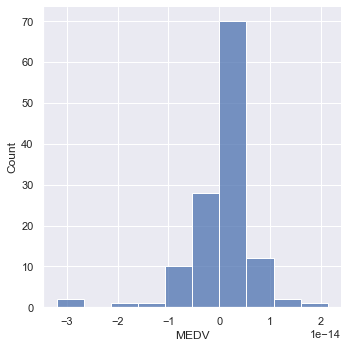

In [47]:
predicted = regression.predict(x_test)
residuals = y_test-predicted
sns.set(rc={'figure.figsize':(11,8)})
sns.displot(residuals, bins=10)
plt.show()

In [48]:
# mean of residuals is almost 0
residuals.mean()

-6.224242468764657e-16

In [49]:
## Hence all the assumptions are satisfied

Project Done By: Urvi Gadda

mailto: urvigada96@gmail.com

In [53]:
## Check cross validation score
lasso_reg_kfold = Lasso(alpha)
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso_reg_kfold.fit(X_train, y_train)
    print(lasso_reg_kfold.score(X_test, y_test))

0.9999999998670763
0.9999999999471749
0.9999999976462592
0.9999999999011469
0.9999999996551373
0.9999999996758322
0.9999999981542311
0.999999999747144
0.9999999972038824
0.9999999971759358
